# MSA 2025 Phase 2 - Part 2: Minimum Temperature Prediction from Weather Data

In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load and check the dataset

In [28]:
df = pd.read_csv("Summary of Weather.csv", encoding='latin1')
# Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

/var/folders/y1/ynjsly15673g3_l_pflmnf6c0000gn/T/ipykernel_34106/3208894597.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Summary of Weather.csv", encoding='latin1')


In [6]:
# Preview
df.head(10)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10001,1942-7-6,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001,1942-7-7,T,NaN,28.333333,22.777778,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10001,1942-7-8,3.556,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10001,1942-7-9,T,NaN,27.222222,22.777778,25.000000,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10001,1942-7-10,3.556,NaN,25.555556,21.666667,23.333333,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Basic stats
df.describe(include='all')

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
count,119040.000000,119040,119040,532.000000,119040.000000,119040.000000,119040.000000,117877.0,34237,119040.000000,...,0.0,0.0,0.0,525.000000,34237,0.0,0.0,0.0,0.0,0.0
unique,NaN,2192,540,NaN,NaN,NaN,NaN,42.0,39,NaN,...,NaN,NaN,NaN,NaN,39,NaN,NaN,NaN,NaN,NaN
top,NaN,1945-4-16,0,NaN,NaN,NaN,NaN,0.0,1,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,122,64267,NaN,NaN,NaN,NaN,86090.0,25846,NaN,...,NaN,NaN,NaN,NaN,25846,NaN,NaN,NaN,NaN,NaN
mean,29659.435795,NaN,NaN,37.774534,27.045111,17.789511,22.411631,NaN,NaN,43.805284,...,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN,NaN
std,20953.209402,NaN,NaN,10.297808,8.717817,8.334572,8.297982,NaN,NaN,1.136718,...,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN,NaN
min,10001.000000,NaN,NaN,18.520000,-33.333333,-38.333333,-35.555556,NaN,NaN,40.000000,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,NaN,NaN,29.632000,25.555556,15.000000,20.555556,NaN,NaN,43.000000,...,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,NaN,NaN,37.040000,29.444444,21.111111,25.555556,NaN,NaN,44.000000,...,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,NaN,NaN,43.059000,31.666667,23.333333,27.222222,NaN,NaN,45.000000,...,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Convert date columns
df['Date'] = pd.to_datetime(df['Date'])

# Check data types after conversion
df.dtypes

STA                     int64
Date           datetime64[ns]
Precip                 object
WindGustSpd           float64
MaxTemp               float64
MinTemp               float64
MeanTemp              float64
Snowfall               object
PoorWeather            object
YR                      int64
MO                      int64
DA                      int64
PRCP                   object
DR                    float64
SPD                   float64
MAX                   float64
MIN                   float64
MEA                   float64
SNF                    object
SND                   float64
FT                    float64
FB                    float64
FTI                   float64
ITH                   float64
PGT                   float64
TSHDSBRSGF             object
SD3                   float64
RHX                   float64
RHN                   float64
RVG                   float64
WTE                   float64
dtype: object

## 2. Clean the dataset, drop variables

In [ ]:
# Convert numeric object columns to float
for col in ['Precip', 'Snowfall', 'SNF', 'PRCP']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop columns with >95% missing values
threshold = len(df) * 0.05
df_clean = df.dropna(thresh=threshold, axis=1)

# Drop redundant or unused columns 
cols_to_drop = ['MAX', 'MIN', 'MEA', 'SNF', 'DR', 'SPD', 'PRCP', 'Date', 'PoorWeather', 'TSHDSBRSGF']
df_clean = df_clean.drop(columns=cols_to_drop, errors="ignore")

# Drop non-informative columns
df_clean = df_clean.drop(columns=['STA'], errors="ignore")

# Drop rows with remaining NaNs
df_model = df_clean.dropna()


## 3. Select the feature(s) for the model, and explain the reason

In [ ]:
# Reason: These features were chosen based on domain knowledge 
# and initial correlation analysis, aiming to include variables that are independent, 
# non-redundant, and potentially predictive of MinTemp.

# Selected features
X = df_model[['MaxTemp', 'MeanTemp', 'Precip', 'Snowfall']]
y = df_model['MinTemp']


## 4. Split the dataset (80% for training, 20% for testing)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, test_size=0.2)


## 5. Choose the algorithm, train and test the model

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


## 6. Evaluate and Visualize model Performance

0.9828583534513746
1.0421698714590493


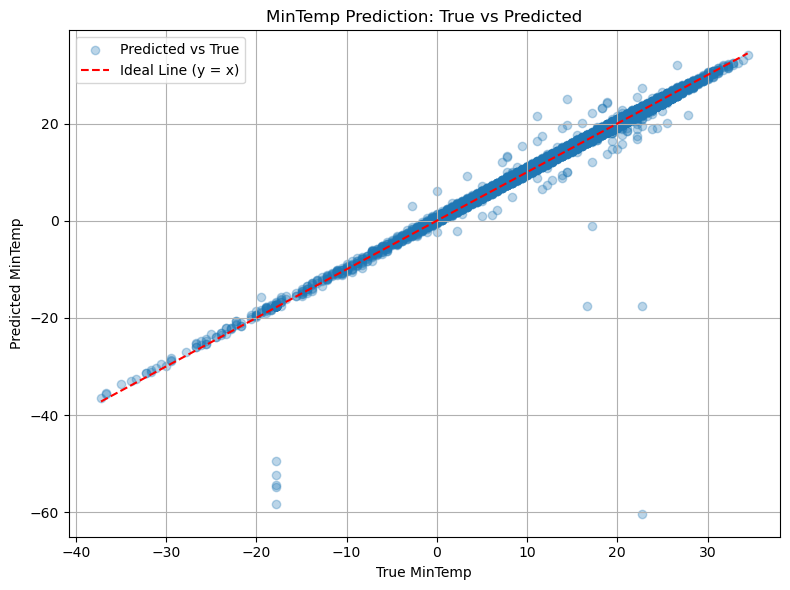

In [46]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Compute metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(r2)
print(rmse)

# Visualise the outcome
plt.figure(figsize=(8, 6))
scatter = plt.scatter(y_test, y_pred, alpha=0.3, label='Predicted vs True')
line = plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Line (y = x)')

plt.xlabel("True MinTemp")
plt.ylabel("Predicted MinTemp")
plt.title("MinTemp Prediction: True vs Predicted")
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


## 7. What is the R² value and RMSE of the model? How these values indicate the model performance?

**R² value**: 0.983 (3 significant figures)

**RMSE**: 1.042 (3 significant figures)

These metrics indicate excellent model performance. An R² of 0.983 means that 98.3% of the variance in MinTemp can be explained by the selected features. This shows that the model captures the underlying pattern in the data very well.

The low RMSE of 1.042 means that, on average, the predicted minimum temperatures deviate from the true values by just over 1°C which suggests that the model makes accurate predictions with minimal error.

## 8. Discuss the model performance based on the plot

The scatter plot shows that most predicted MinTemp values closely align with the actual values, forming a strong diagonal pattern along the ideal line (y = x). The tight clustering around the line suggests high accuracy and low error. A few outliers deviate significantly, likely due to unusual weather events or data noise, but they do not significantly impact overall performance.